In [1]:
import os
from pathlib import Path
from torchvision import transforms
import torch

In [2]:
from utils import dataloader, engine, save_load
from models import model_builder

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_dir = Path("data/")
train_path = base_dir / 'dataset_1' / 'train'
test_path = base_dir / 'dataset_1'/ 'test'

In [4]:
print("Train path:", train_path)
print("Exists?", os.path.exists(train_path))
print("Contains:", os.listdir(train_path))

Train path: data\dataset_1\train
Exists? True
Contains: ['french_toast', 'garlic_bread']


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.0001

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [7]:
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [8]:
train_dataloader, test_dataloader, class_names = dataloader.create_dataloaders(
    test_dir=test_path,
    train_dir=train_path,
    transform=data_transform,
    batch_size=BATCH_SIZE,
)

In [9]:
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

In [10]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

In [11]:
history = engine.train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=NUM_EPOCHS,
    device=device,
)

Training Epochs:  20%|██        | 1/5 [00:09<00:39,  9.85s/it]

Epoch: 1/5 | Train Loss: 0.6980 | Train Acc: 0.4233 | Test Loss: 0.6913 | Test Acc: 0.5521 |


Training Epochs:  40%|████      | 2/5 [00:19<00:29,  9.71s/it]

Epoch: 2/5 | Train Loss: 0.6952 | Train Acc: 0.4716 | Test Loss: 0.6950 | Test Acc: 0.4479 |


Training Epochs:  60%|██████    | 3/5 [00:31<00:21, 10.85s/it]

Epoch: 3/5 | Train Loss: 0.6914 | Train Acc: 0.5426 | Test Loss: 0.6936 | Test Acc: 0.4479 |


Training Epochs:  80%|████████  | 4/5 [00:45<00:12, 12.14s/it]

Epoch: 4/5 | Train Loss: 0.6921 | Train Acc: 0.5000 | Test Loss: 0.6959 | Test Acc: 0.4479 |


Training Epochs: 100%|██████████| 5/5 [00:58<00:00, 11.69s/it]

Epoch: 5/5 | Train Loss: 0.7001 | Train Acc: 0.4574 | Test Loss: 0.6942 | Test Acc: 0.4479 |


In [12]:
save_load.save_model(model=model,
                 target_dir="models",
                 model_name="tiny_vgg_model_1.pth")

[INFO] Saving model to: models\tiny_vgg_model_1.pth


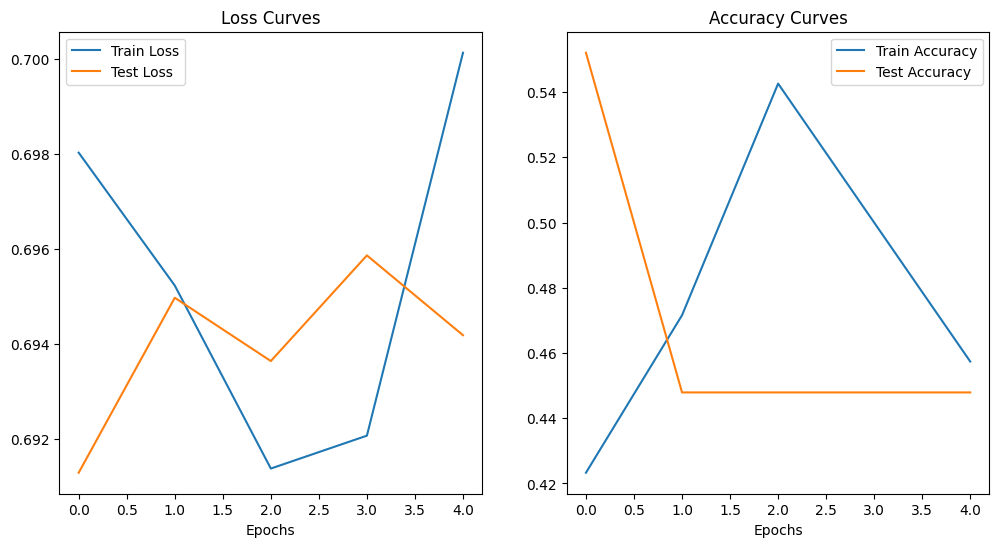

In [13]:
from utils.plots import plot_loss_curves

plot_loss_curves(history)